In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],[[4],[5],[6]],[[7],[8],[9]]]],dtype = np.float32)

In [9]:
print(image.shape)

(1, 3, 3, 1)


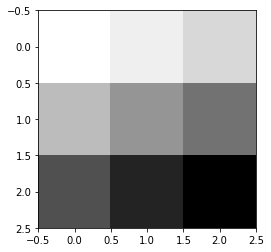

In [10]:
plt.imshow(image.reshape(3,3),cmap = 'Greys')

In [11]:
print(image.reshape(3,3))

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


In [12]:
print('image.shape',image.shape)

image.shape (1, 3, 3, 1)


In [13]:
weight = tf.constant([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


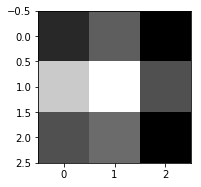

In [21]:
print('weight.shape',weight.get_shape())
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding ='SAME')
conv2d_img = conv2d.eval()
print('conv2d_img.shape',conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1),plt.imshow(one_img.reshape(3,3),cmap='gray')


In [18]:
tf.__version__


'0.12.1'

In [25]:
print('image.shape',image.shape)
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])

image.shape (1, 3, 3, 1)


In [26]:
print('weight.shape',weight.get_shape())

weight.shape (2, 2, 1, 3)


In [27]:
conv2d = tf.nn.conv2d(image,weight,strides = [1,1,1,1],padding = 'SAME')
conv2d_img = conv2d.eval()
print('conv2d_img.shape',conv2d_img.shape)

conv2d_img.shape (1, 3, 3, 3)


[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


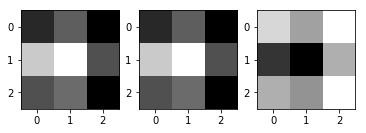

In [28]:
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1),plt.imshow(one_img.reshape(3,3),cmap = 'gray')

In [29]:
image  =  np.array([[[[4],[3]],[[2],[1]]]],dtype = np.float32)
pool = tf.nn.max_pool(image,ksize = [1,2,2,1],strides = [1,1,1,1],padding = 'VALID')

In [31]:
print(pool.get_shape())
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


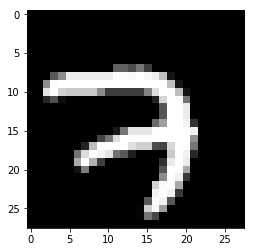

In [3]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img,cmap = 'gray')

Tensor("Conv2D:0", shape=(1, 14, 14, 5), dtype=float32)


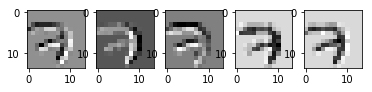

In [4]:
sess = tf.InteractiveSession()
img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3,3,1,5],stddev = 0.01))
conv2d = tf.nn.conv2d(img,W1,strides = [1,2,2,1],padding = 'SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14),cmap ='gray')

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


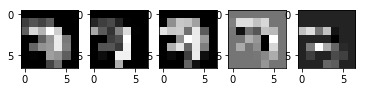

In [5]:
pool = tf.nn.max_pool(conv2d,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1),plt.imshow(one_img.reshape(7,7),cmap = 'gray')

In [6]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [7]:
X = tf.placeholder(tf.float32,[None,784])
X_img = tf.reshape(X,[-1,28,28,1])
Y = tf.placeholder(tf.float32,[None,10])
print(X_img)

Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)


In [8]:
W1 = tf.Variable(tf.random_normal([3,3,1,32],stddev = 0.01))

In [9]:
L1 = tf.nn.conv2d(X_img,W1,strides = [1,1,1,1],padding = 'SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1,ksize=[1,2,2,1],strides = [1,2,2,1],padding = 'SAME')

In [10]:
W2 = tf.Variable(tf.random_normal([3,3,32,64],stddev = 0.01))
L2 = tf.nn.conv2d(L1,W2,strides = [1,1,1,1],padding = 'SAME')
L2 = tf.nn.max_pool(L2,ksize = [1,2,2,1],strides = [1,2,2,1],padding = 'SAME')
L2 = tf.reshape(L2,[-1,7*7*64])

In [11]:
W3 = tf.get_variable('W3',shape = [7*7*64,10],initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2,W3)+b

In [12]:
#define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [13]:
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('Learning started. it takes time')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/ batch_size)
    for i in range(total_batch):
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs,Y:batch_ys}
        c,_, = sess.run([cost,optimizer],feed_dict = feed_dict)
        avg_cost+=c/total_batch
    print('Epoch:','%04d' %(epoch + 1), 'cost=','{:.9f}'.format(avg_cost))
print('Learning finished')

correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print('Accuracy:',sess.run(accuracy,feed_dict = {X:mnist.test.images,Y:mnist.test.labels}))

Learning started. it takes time
Epoch: 0001 cost= 0.446895751
Epoch: 0002 cost= 0.120266671
Epoch: 0003 cost= 0.080508918
Epoch: 0004 cost= 0.063262495
Epoch: 0005 cost= 0.053612529
Epoch: 0006 cost= 0.047759582
Epoch: 0007 cost= 0.041270808
Epoch: 0008 cost= 0.035730568
Epoch: 0009 cost= 0.032075082
Epoch: 0010 cost= 0.029188716
Epoch: 0011 cost= 0.026680961
Epoch: 0012 cost= 0.023348962
Epoch: 0013 cost= 0.021118430
Epoch: 0014 cost= 0.017907961
Epoch: 0015 cost= 0.016659803
Learning finished
Accuracy: 0.9863
